In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

In [5]:
cols = ["mean radius", "mean texture",
        "mean smoothness", "mean compactness", "mean concave points",
        "worst radius", "worst texture",
        "worst smoothness", "worst compactness", "worst concave points",
        "class"]

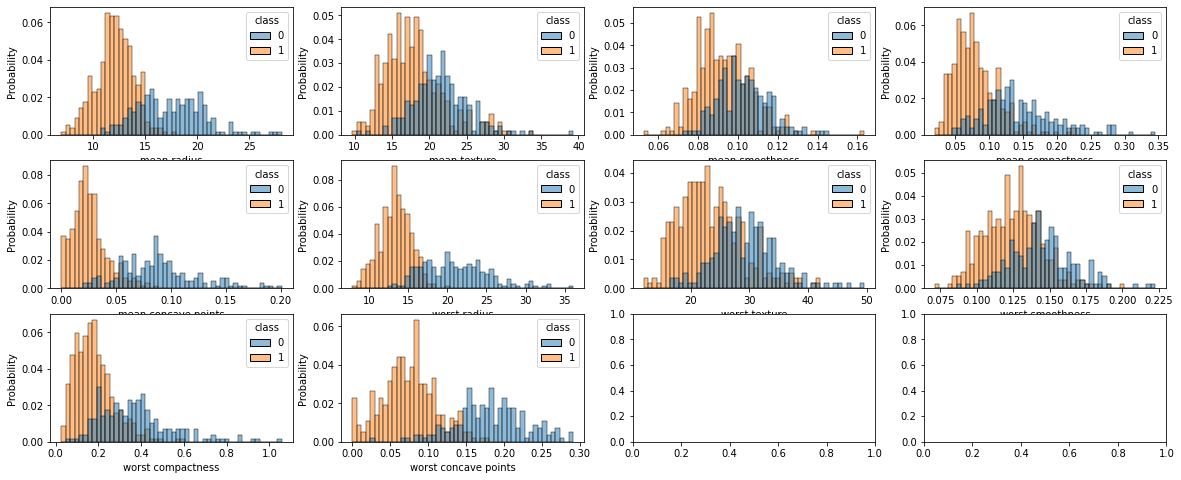

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(20, 8))
for col, ax in zip(cols[:-1], axs.ravel()):
    sns.histplot(df, x=col, hue=cols[-1], bins=50, stat='probability', ax=ax)

In [8]:
data = torch.from_numpy(df[cols].values).float()
X = data[:, :-1]
y = data[:, -1:]
X.shape, y.shape

(torch.Size([569, 10]), torch.Size([569, 1]))

In [9]:
n_epochs = 100000
learning_rate = 1e-2
print_interval = 10000

In [10]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()

    def forward(self, X):
        y = self.act(self.linear(X))
        return y

In [11]:
model = MyModel(input_dim=X.shape[-1], output_dim=y.shape[-1])
crit = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [13]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = crit(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % print_interval == 0:
        print(f'Epoch {i + 1}: loss={loss:.5f}')

Epoch 10000: loss=0.07946
Epoch 20000: loss=0.07356
Epoch 30000: loss=0.07149
Epoch 40000: loss=0.07031
Epoch 50000: loss=0.06936
Epoch 60000: loss=0.06856
Epoch 70000: loss=0.06790
Epoch 80000: loss=0.06737
Epoch 90000: loss=0.06696
Epoch 100000: loss=0.06665


In [14]:
correct_cnt = (y == (y_hat > 0.5)).sum()
total_cnt = y.shape[0]

print(f'Accuracy: {correct_cnt / total_cnt:.4f}')

Accuracy: 0.9789


<AxesSubplot:xlabel='y_hat', ylabel='Probability'>

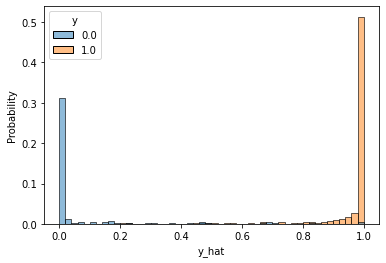

In [15]:
df = pd.DataFrame(torch.concat([y, y_hat], dim=1).detach().numpy(), columns=['y', 'y_hat'])
sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')